# Начинаем работу ...  

Датафрейм: Продажа домов в округе Кинг (вариант-6)  
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Подключим датафрейм и выгрузим данные
df = pd.read_csv(".//static//csv//kc_house_data.csv")

print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [13]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [14]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [15]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

print(df.isnull().sum())

print(df.isnull().any())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [16]:
# Проверка типов столбцов
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Атрибуты  

id - уникальный идентификатор дома  

date - Дата продажи дома  

price - Цена дома в долларах США  

bedrooms - Количество спален в доме  

bathrooms - Количество ванных комнат, включая дробные значения (н, 2.5 означает 2 ванны и 1 туалет)  

sqft_living - Жилая площадь дома (в кв. футах)  

sqft_lot - Общая площадь участка  

floors - Количество этажей в доме  

waterfront - Есть ли вид на воду (1 - да, 0 - нет)  

view - Оценка вида дома (0-4)  

condition - Оценка состояния дома (1 - плохое, 5 - отличное)  

grade - Оценка качество дома по архитектурным и строительным стандартам (1-13)  

sqft_basement - Площадь подвала дома.  

yr_built - Год постройки дома  

yr_renovated - Год послежней реновации дома (0, если реновация не проводилась)  

zipcode - Почтовый индекс местоположения дома  

sqft_living15 - Средняя жилая площадб домов в 15 ближайших соседях  

price_category - Категория цены дома (low, medium, high)  

**Цель:** Кластеризация домов на группы для определения схожих ценовых категорий и характеристик.  

К примеру, Группировка домов для анализа рыночных трендов. Определение похожих групп домов для маркетинговых или инвестиционных целей.

## Очистка данных

In [17]:
# Удалим несущественные столбцы
columns_to_drop = ['id', 'date', 'grade', 'yr_renovated', 'sqft_living15', 'lat', 'long', 'sqft_lot15', 'sqft_above', 'zipcode']
df_cleaned = df.drop(columns=columns_to_drop)

print(df_cleaned.head())  # Вывод очищенного DataFrame

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  sqft_basement  yr_built  
0     0          3              0      1955  
1     0          3            400      1951  
2     0          3              0      1933  
3     0          5            910      1965  
4     0          3              0      1987  


## Визуализация парных взаимосвязей

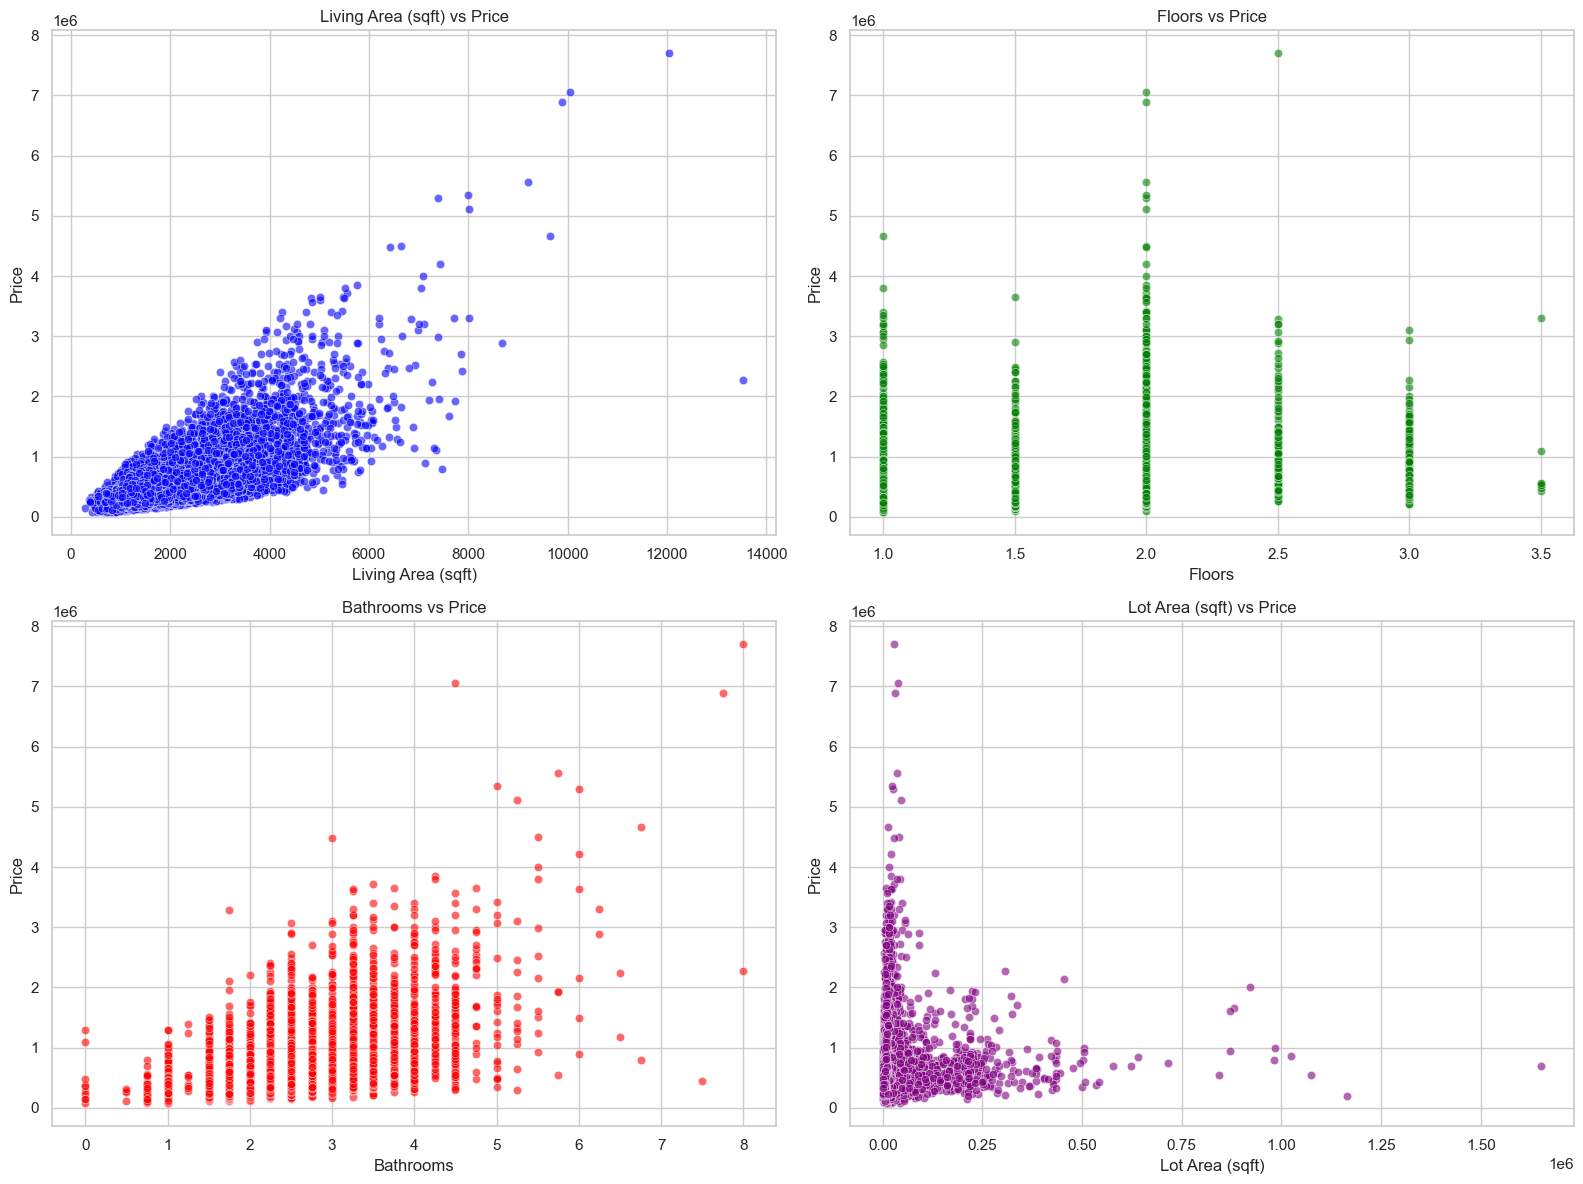

In [18]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры
plt.figure(figsize=(16, 12))

# График 1: Площадь vs Цена
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'], alpha=0.6, color='blue')
plt.title('Living Area (sqft) vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')

# График 2: Количество спален vs Цена
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['floors'], y=df_cleaned['price'], alpha=0.6, color='green')
plt.title('Floors vs Price')
plt.xlabel('Floors')
plt.ylabel('Price')

# График 3: Количество ванных комнат vs Цена
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['bathrooms'], y=df_cleaned['price'], alpha=0.6, color='red')
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

# График 4: Площадь участка vs Цена
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['sqft_lot'], y=df_cleaned['price'], alpha=0.6, color='purple')
plt.title('Lot Area (sqft) vs Price')
plt.xlabel('Lot Area (sqft)')
plt.ylabel('Price')

# Упорядочиваем графики
plt.tight_layout()
plt.show()

### Стандартизация данных для кластеризации

In [19]:
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

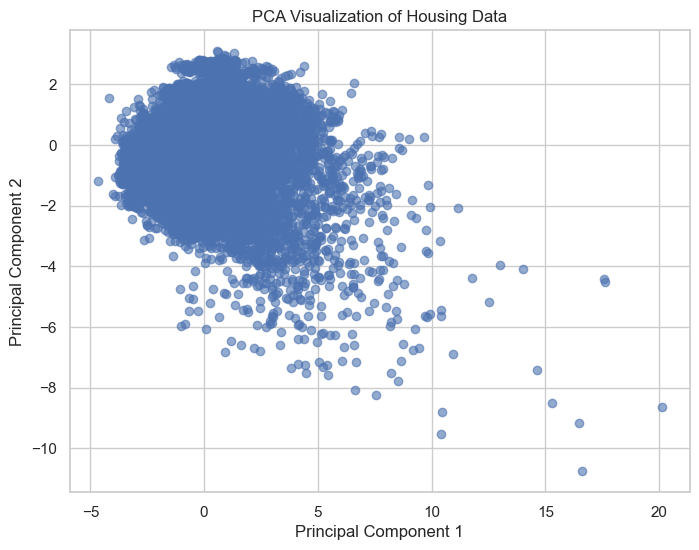

In [20]:
# Преобразование в DataFrame для удобства
df_scaled = pd.DataFrame(data_scaled, columns=df_cleaned.columns)

# Понижение размерности до 2 компонент
pca = PCA(n_components=2)
kc_pca = pca.fit_transform(df_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(kc_pca[:, 0], kc_pca[:, 1], alpha=0.6)
plt.title("PCA Visualization of Housing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Агломеративная (иерархическая) кластеризация

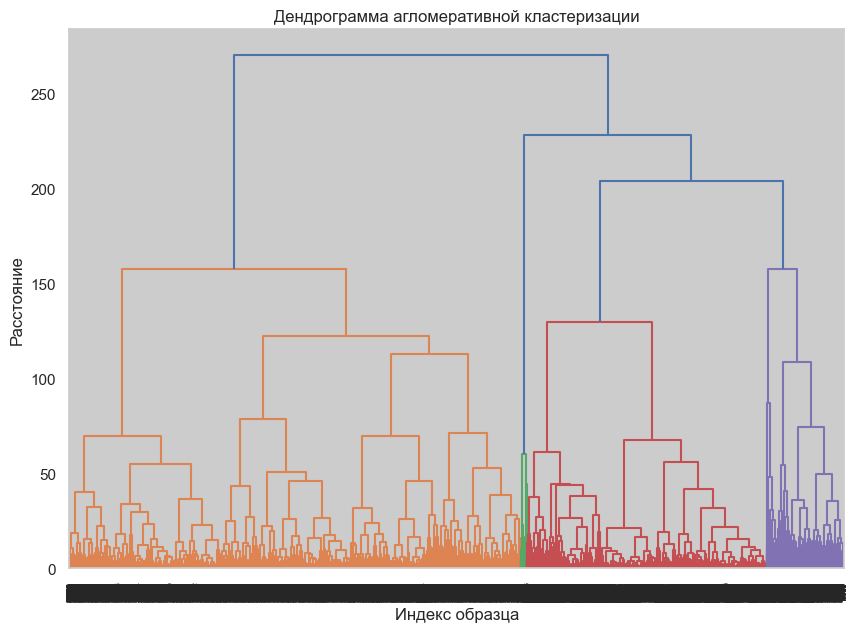

[ 2  7  2 ... 14 14 14]


In [21]:
# Построение дендрограммы
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=60, criterion='distance')
print(result)  # Вывод результатов кластеризации

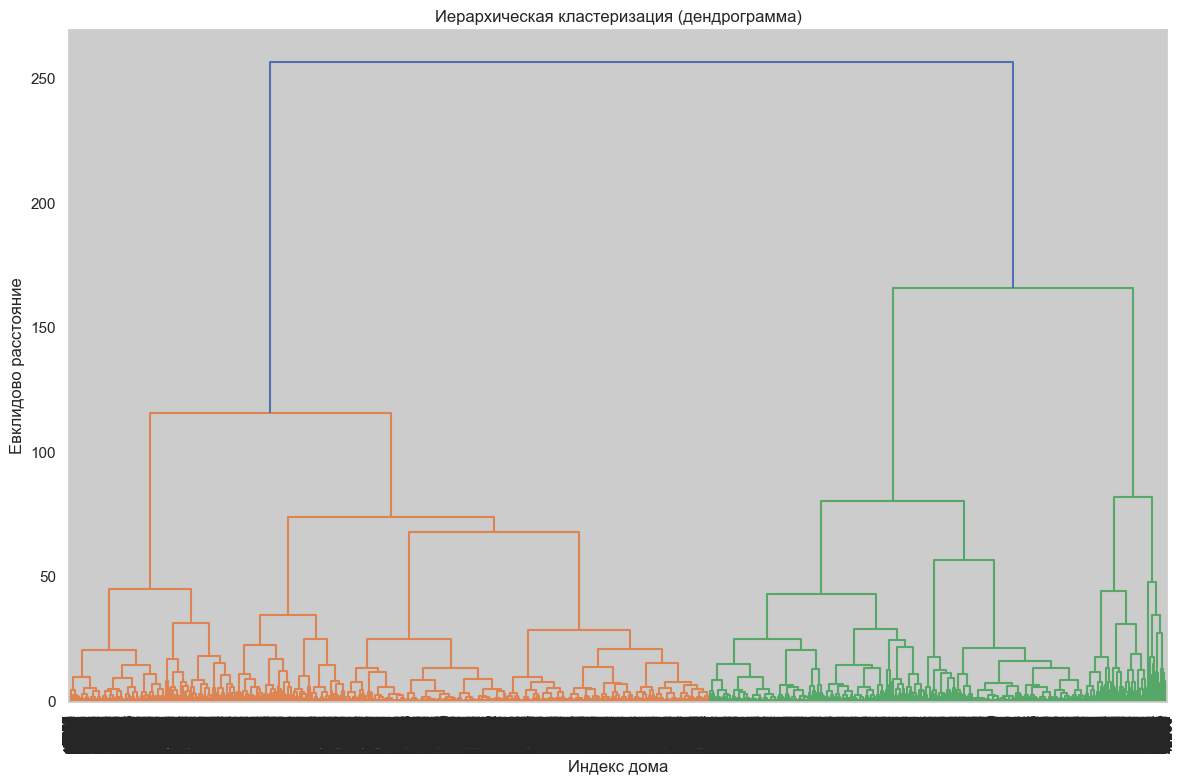

In [22]:
# Выбираем подмножество данных для кластеризации
features = df[['price', 'sqft_living', 'floors', 'bathrooms']]

scaled_features = scaler.fit_transform(features)

# Построение дендрограммы
linkage_matrix = linkage(scaled_features, method='ward')  # Метод "Ward"

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Иерархическая кластеризация (дендрограмма)')
plt.xlabel('Индекс дома')
plt.ylabel('Евклидово расстояние')
plt.tight_layout()
plt.show()

**Визуализация распределения кластеров**

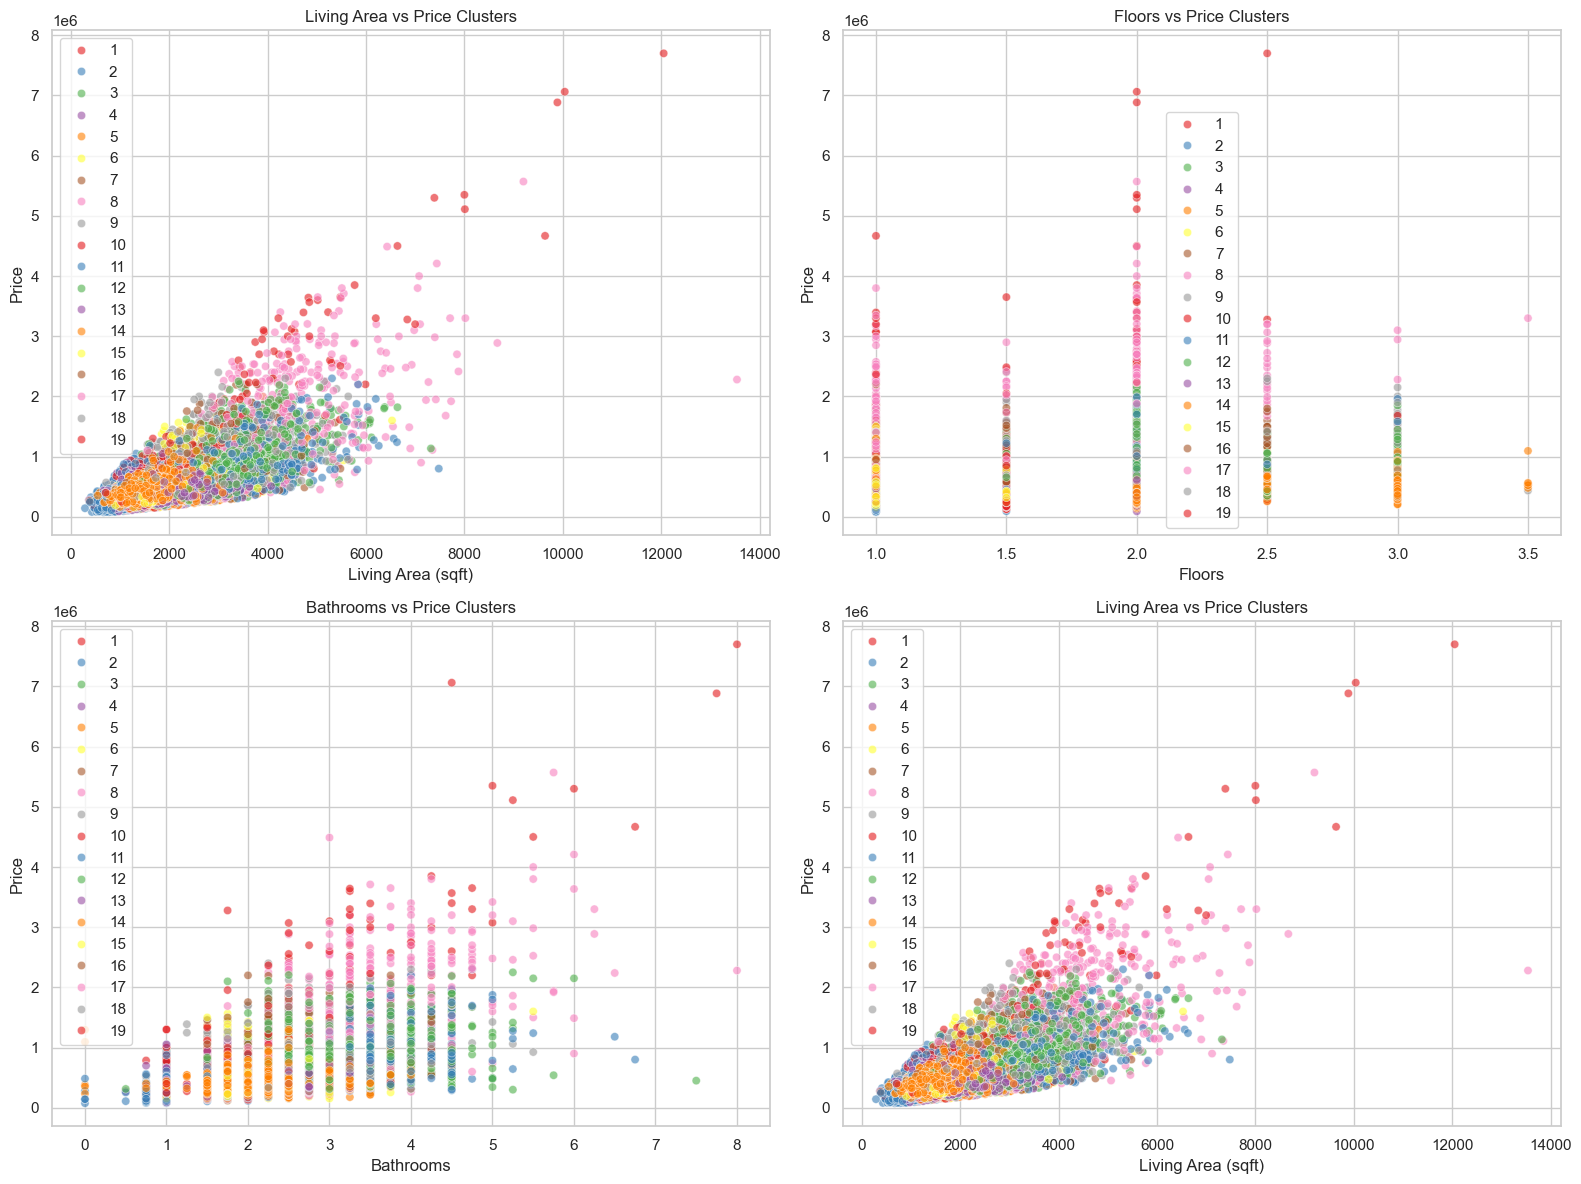

In [23]:
# Визуализация кластеров
plt.figure(figsize=(16, 12))

# Парный график 1: sqft_living vs price
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'], hue=result, palette='Set1', alpha=0.6)
plt.title('Living Area vs Price Clusters')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')

# Парный график 2: bedrooms vs price
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['floors'], y=df_cleaned['price'], hue=result, palette='Set1', alpha=0.6)
plt.title('Floors vs Price Clusters')
plt.xlabel('Floors')
plt.ylabel('Price')

# Парный график 3: bathrooms vs sqft_living
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['bathrooms'], y=df_cleaned['price'], hue=result, palette='Set1', alpha=0.6)
plt.title('Bathrooms vs Price Clusters')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

# Парный график 4: sqft_living vs bedrooms
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'], hue=result, palette='Set1', alpha=0.6)
plt.title('Living Area vs Price Clusters')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')

# Настройка графиков
plt.tight_layout()
plt.show()

## KMeans (неиерархическая кластеризация) для сравнения

Центры кластеров:
 [[2.22041876e+03 5.15870327e+05 2.07766990e+00 2.47761993e+00
  3.43303826e+00]
 [2.21224000e+03 5.28096070e+05 1.07634518e+00 2.19979695e+00
  3.87857868e+00]
 [1.32625308e+03 3.60889221e+05 1.10303964e+00 1.36120782e+00
  2.67688806e+00]
 [3.88146209e+03 1.24719106e+06 1.89801444e+00 3.31836643e+00
  4.38447653e+00]]


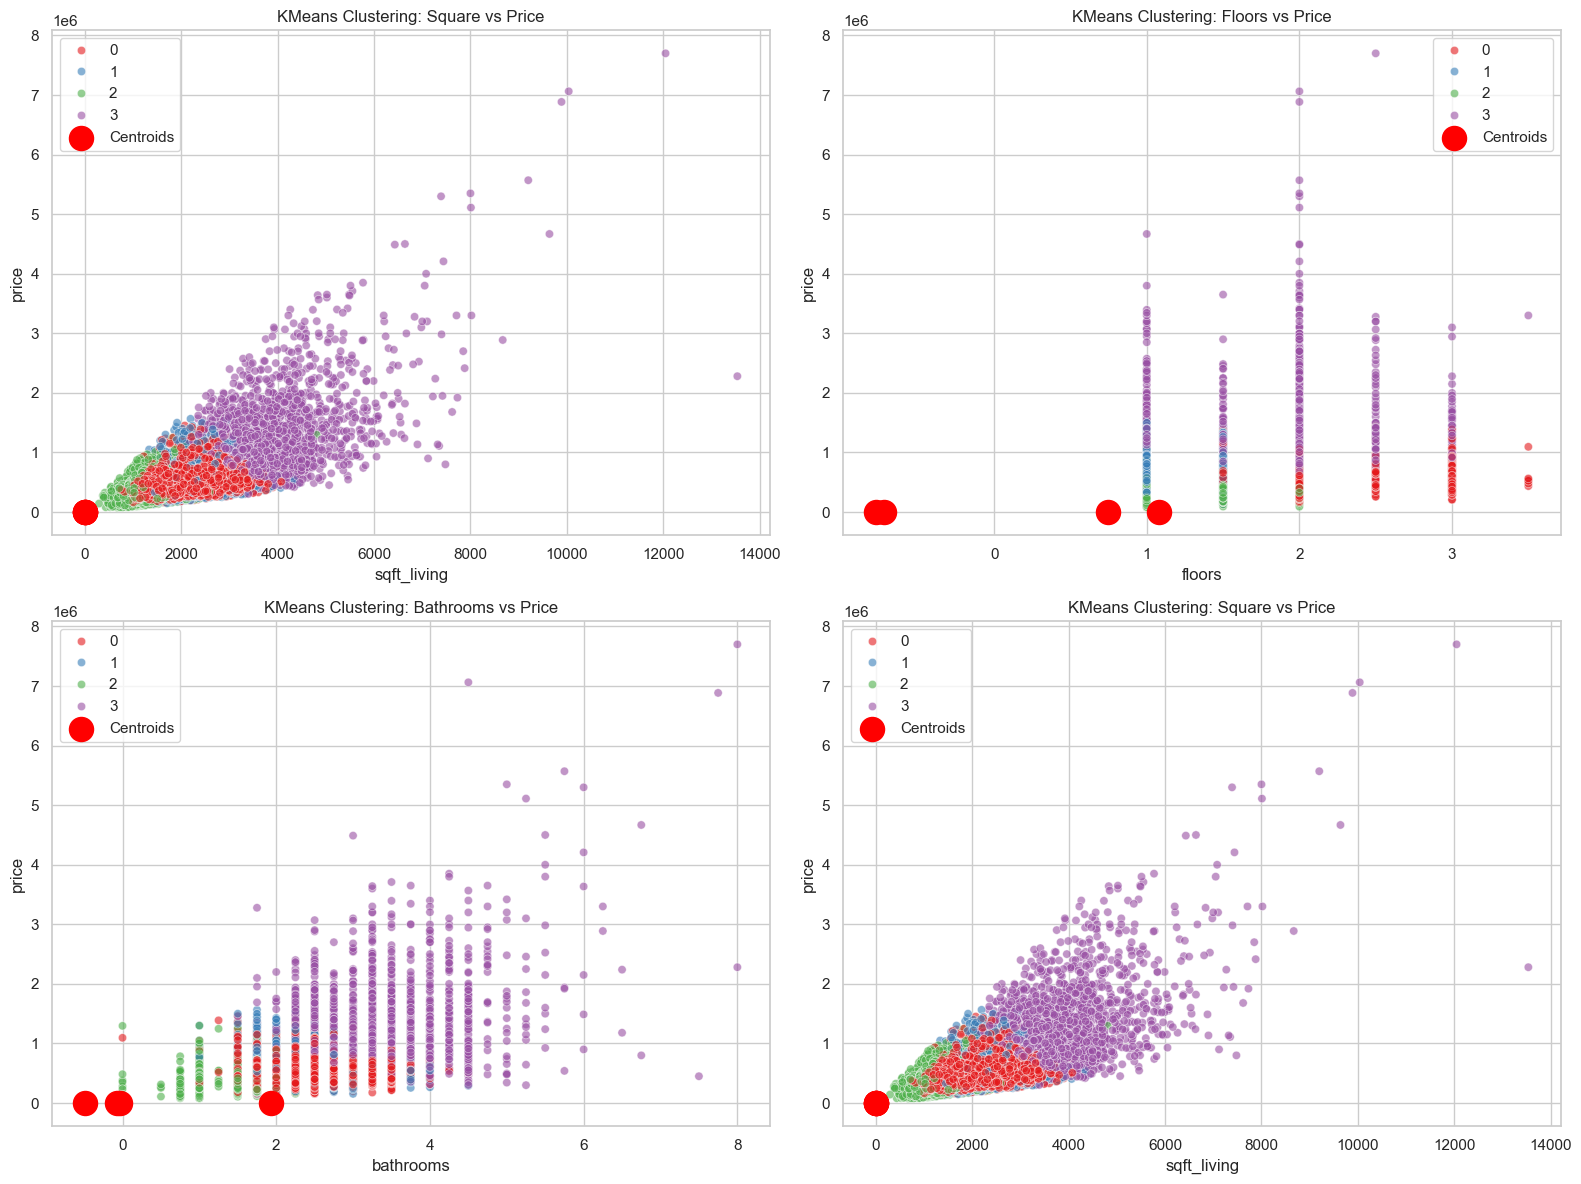

In [24]:
# Убедитесь, что масштабирование применяется только к нужным признакам
features_used = ['sqft_living', 'price', 'floors', 'bathrooms', 'bedrooms']
data_to_scale = df_cleaned[features_used]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

random_state = 42
kmeans = KMeans(n_clusters=4, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers_original = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers_original)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Square vs Price')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['floors'], y=df_cleaned['price'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Floors vs Price')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['bathrooms'], y=df_cleaned['price'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Bathrooms vs Price')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Square vs Price')
plt.legend()

plt.tight_layout()
plt.show()

### PCA для визуализации сокращенной размерности

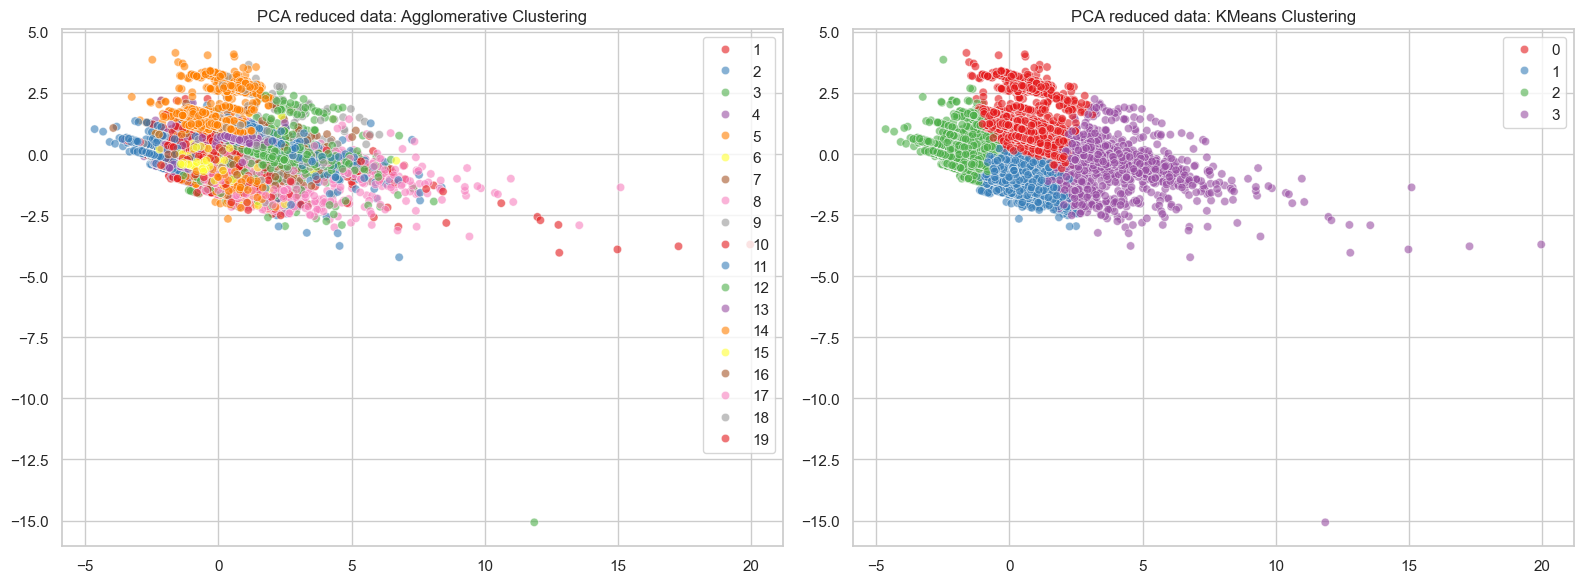

In [25]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()

### Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)

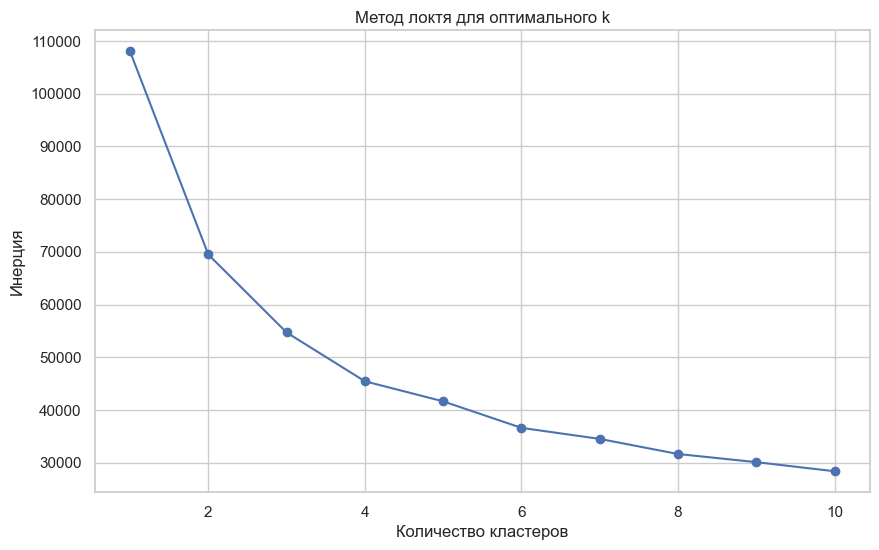

In [26]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

### Расчет коэффициентов силуэта

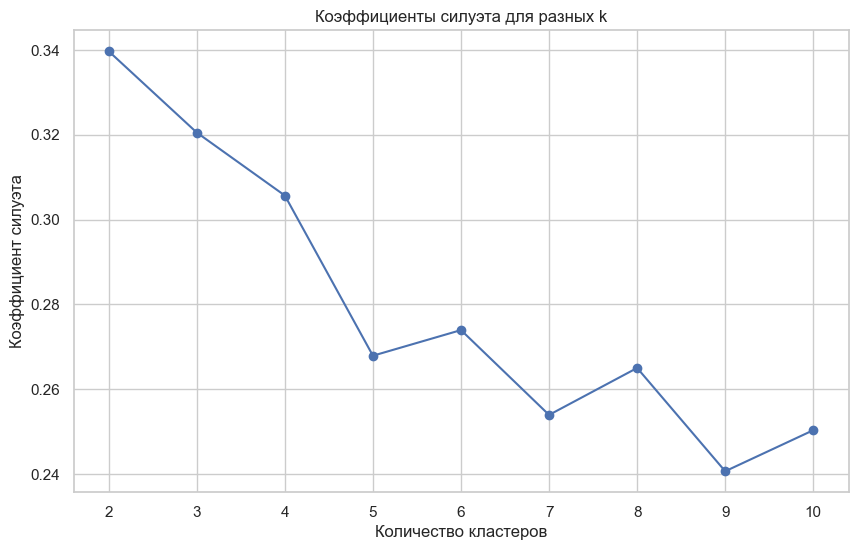

In [27]:
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.250


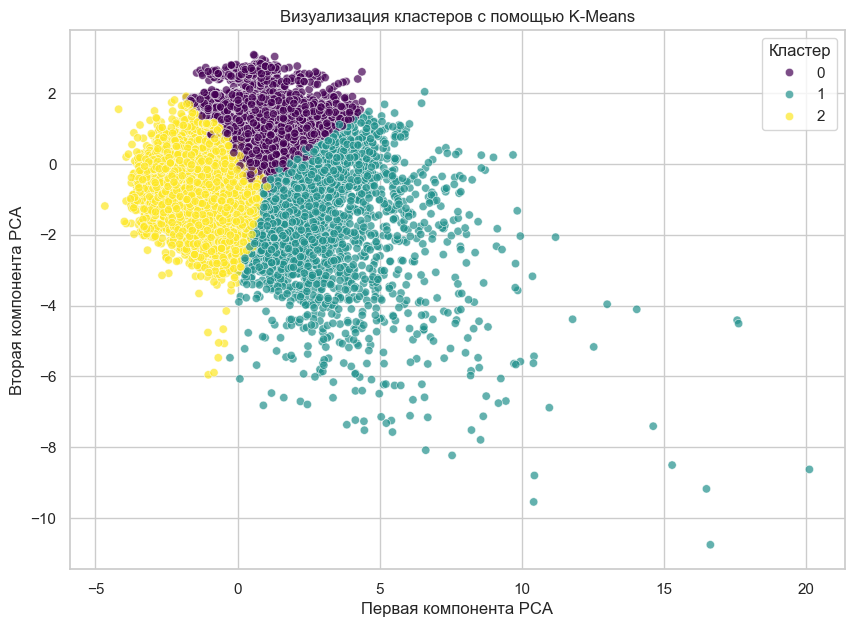

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# ========================
# Применение K-Means
# ========================
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg = silhouette_score(df_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# ========================
# Визуализация кластеров
# ========================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Средний коэффициент силуэта, равный 0.250, указывает на умеренно хорошую кластеризацию.  

Средний коэффициент силуэта (silhouette score) указывает на качество кластеризации, измеряя, насколько хорошо точки внутри одного кластера близки друг к другу по сравнению с точками из других кластеров. Значения коэффициента силуэта находятся в диапазоне от -1 до 1:

1: Указывает на идеально плотные и четко разделенные кластеры.  
0: Указывает на перекрытие кластеров или слабую структуру кластеризации.  
Отрицательные значения: Указывают, что точки в кластере расположены ближе к другому кластеру, чем к своему.

Средний коэффициент силуэта (агломеративная кластеризация): 0.225


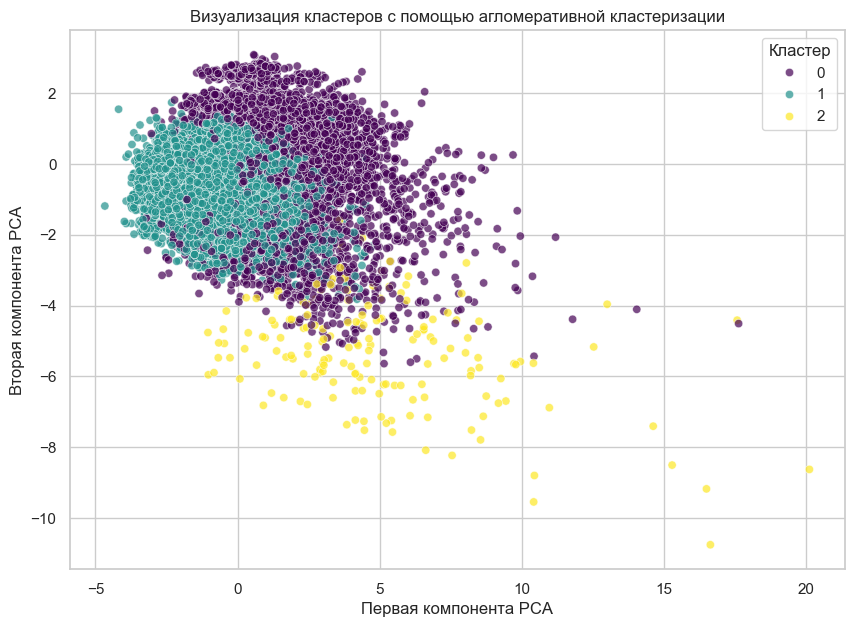

In [29]:
from sklearn.cluster import AgglomerativeClustering

# ========================
# Агломеративная кластеризация
# ========================
agg_cluster = AgglomerativeClustering(n_clusters=3)  
labels_agg = agg_cluster.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg_agg = silhouette_score(df_scaled, labels_agg)
print(f'Средний коэффициент силуэта (агломеративная кластеризация): {silhouette_avg_agg:.3f}')

# ========================
# Визуализация кластеров
# ========================
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_agg, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью агломеративной кластеризации')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Значение коэффициента силуэта лежит в диапазоне от -1 до 1. Ближе к 1: Хорошо сформированные, плотные кластеры, четко отделенные друг от друга.  

Ближе к 0: Кластеры пересекаются или слабо разделены, не имеют четких границ. Точки расположены одинаково близко как к своему кластеру, так и к соседним. 
Ближе к -1 (Отрицательные значения): Некоторые точки скорее относятся к другим кластерам, чем к текущему (ближе к центрам других кластеров). Очень плохая кластеризация.  
Ближе к 1: Все точки внутри каждого кластера плотно сгруппированы и значительно удалены от точек других кластеров. Свидетельствует о четкой и хорошо разделенной структуре данных. Единица говорит об идеальной кластеризации.

Значение 0.225 указывает на то, что кластеры с нечеткой границей и неоптимальный выбор числа кластеров или особенности данных, затрудняющие их разделение.

Вроде усёё  :)